In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from gauss_no_pivoting import gauss_elimination_no_pivoting
from gauss_pivoting import gauss_elimination_with_pivoting
from lu_no_pivoting import lu_factorization_no_pivoting
from lu_pivoting import lu_factorization_with_pivoting


def forward_substitution(L, b):
    n = len(L)
    y = np.zeros_like(b)
    for i in range(n):
        y[i] = b[i] - np.dot(L[i, :i], y[:i])
    return y

def backward_substitution(U, y):
    n = len(U)
    x = np.zeros_like(y)
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]
    return x

def residual_norm(A, x, b):
    return np.linalg.norm(np.dot(A, x) - b)

sizes = [2**i for i in range(1, 13)]
methods = ["Gauss no pivot", "Gauss with pivot", "LU no pivot", "LU with pivot"]
errors = {method: [] for method in methods}
times = {method: [] for method in methods}

for n in sizes:
    A = np.random.randn(n, n)
    b = np.random.randn(n)

    print(f"\n--- Size {n}x{n} ---")

    start = time.time()
    x = gauss_elimination_no_pivoting(A.copy(), b.copy())
    end = time.time()
    errors["Gauss no pivot"].append(residual_norm(A, x, b))
    times["Gauss no pivot"].append(end - start)


    start = time.time()
    x = gauss_elimination_with_pivoting(A.copy(), b.copy())
    end = time.time()
    errors["Gauss with pivot"].append(residual_norm(A, x, b))
    times["Gauss with pivot"].append(end - start)



    start = time.time()
    L, U = lu_factorization_no_pivoting(A.copy())
    y = np.linalg.solve(L, b)
    x = np.linalg.solve(U, y)
    end = time.time()
    errors["LU no pivot"].append(residual_norm(A, x, b))
    times["LU no pivot"].append(end - start)



    start = time.time()
    P, L, U = lu_factorization_with_pivoting(A.copy())
    Pb = np.dot(P, b)
    y = np.linalg.solve(L, Pb)
    x = np.linalg.solve(U, y)
    end = time.time()
    errors["LU with pivot"].append(residual_norm(A, x, b))
    times["LU with pivot"].append(end - start)

    b_num = 10
    B = np.random.rand(b_num, n)


    start = time.time()
    L, U = lu_factorization_no_pivoting(A.copy())
    for i in range(b_num):
        y = forward_substitution(L, B[i])  # Ly = b
        x = backward_substitution(U, y)    # Ux = y
    end = time.time()
    times.setdefault("LU no pivot (multi)", []).append(end - start)




    start = time.time()
    P, L, U = lu_factorization_with_pivoting(A.copy())
    for i in range(b_num):
        Pb = P @ B[i]
        y = forward_substitution(L, Pb)  # Ly = Pb
        x = backward_substitution(U, y)  # Ux = y
    end = time.time()
    times.setdefault("LU with pivot (multi)", []).append(end - start)



    start = time.time()
    for i in range(b_num):
        gauss_elimination_no_pivoting(A.copy(), B[i].copy())
    end = time.time()
    times.setdefault("Gauss no pivot (multi)", []).append(end - start)



    start = time.time()
    for i in range(b_num):
        gauss_elimination_with_pivoting(A.copy(), B[i].copy())
    end = time.time()
    times.setdefault("Gauss with pivot (multi)", []).append(end - start)




--- Size 2x2 ---

--- Size 4x4 ---

--- Size 8x8 ---

--- Size 16x16 ---

--- Size 32x32 ---

--- Size 64x64 ---

--- Size 128x128 ---

--- Size 256x256 ---

--- Size 512x512 ---

--- Size 1024x1024 ---

--- Size 2048x2048 ---

--- Size 4096x4096 ---


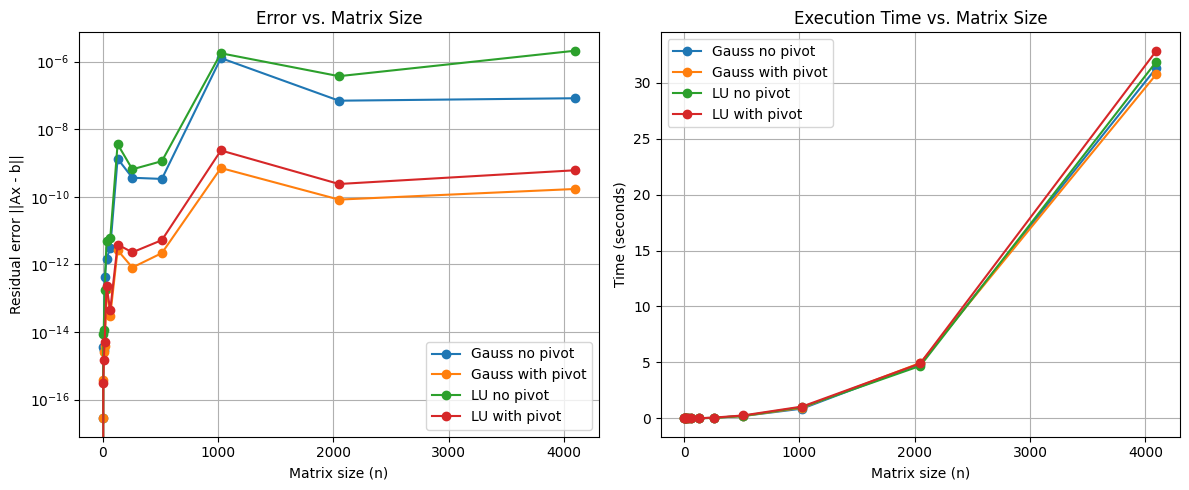

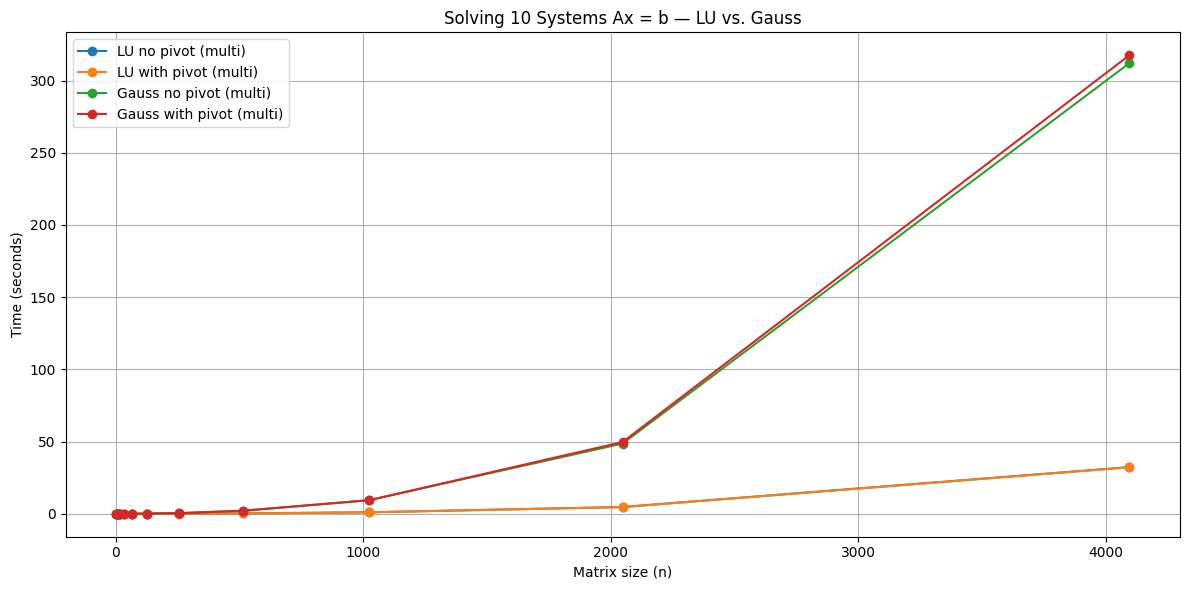

In [2]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for method in methods:
    plt.plot(sizes, errors[method], label=method, marker='o')
plt.yscale("log")
plt.xlabel("Matrix size (n)")
plt.ylabel("Residual error ||Ax - b||")
plt.title("Error vs. Matrix Size")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for method in methods:
    plt.plot(sizes, times[method], label=method, marker='o')
plt.xlabel("Matrix size (n)")
plt.ylabel("Time (seconds)")
plt.title("Execution Time vs. Matrix Size")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for method in ["LU no pivot (multi)", "LU with pivot (multi)", "Gauss no pivot (multi)", "Gauss with pivot (multi)"]:
    if method in times:
        plt.plot(sizes, times[method], label=method, marker='o')

plt.xlabel("Matrix size (n)")
plt.ylabel("Time (seconds)")
plt.title("Solving 10 Systems Ax = b — LU vs. Gauss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
A = np.random.randint(1, 50, size=(14, 14))
b = np.random.randint(1, 50, size=(14,))

x_no_pivoting = gauss_elimination_no_pivoting(A, b)
x_with_pivoting = gauss_elimination_with_pivoting(A, b)

x_linalg = np.linalg.solve(A, b)

residual_no_pivoting = np.linalg.norm(np.dot(A, x_no_pivoting) - b)
residual_with_pivoting = np.linalg.norm(np.dot(A, x_with_pivoting) - b)
residual_linalg = np.linalg.norm(np.dot(A, x_linalg) - b)

print(f"Residual for Gauss No Pivoting: {residual_no_pivoting:.2e}")
print(f"Residual for Gauss With Pivoting: {residual_with_pivoting:.2e}")
print(f"Residual for np.linalg.solve: {residual_linalg:.2e}")

print("\nSolutions comparison:")
print(f"Gauss No Pivoting: {x_no_pivoting}")
print(f"Gauss With Pivoting: {x_with_pivoting}")
print(f"np.linalg.solve: {x_linalg}")

Residual for Gauss No Pivoting: 3.52e-13
Residual for Gauss With Pivoting: 6.93e-14
Residual for np.linalg.solve: 9.97e-14

Solutions comparison:
Gauss No Pivoting: [ 0.52236599  0.55846156 -0.90190671 -0.27739641  0.38757741 -0.67693107
  1.35127757  0.28983367  0.6657733  -0.18942824  1.03855548 -1.78252815
 -0.82674833  0.95964665]
Gauss With Pivoting: [ 0.52236599  0.55846156 -0.90190671 -0.27739641  0.38757741 -0.67693107
  1.35127757  0.28983367  0.6657733  -0.18942824  1.03855548 -1.78252815
 -0.82674833  0.95964665]
np.linalg.solve: [ 0.52236599  0.55846156 -0.90190671 -0.27739641  0.38757741 -0.67693107
  1.35127757  0.28983367  0.6657733  -0.18942824  1.03855548 -1.78252815
 -0.82674833  0.95964665]
